In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv('THUE_BAO_HOA_MANG.csv')

C:\Users\danhd\AppData\Local\Temp\ipykernel_16444\2751950515.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('THUE_BAO_HOA_MANG.csv')


In [3]:
df.sample(5)

,LOAI,MA_THUE_BAO,LOAI_THUE_BAO,NGAY_HOA_MANG,NGAY_HUY,MA_GOI_CUOC,GIA_GOI,NGAY_DANG_KY,NAM_SINH,CMND_3_SO_DAU,CCCD_6_SO_DAU,CN,DOANH_THU_6_THANG_DAU
516672,C,118053262283,ZMT,3/23/2024,NaN,D5,5000.0,3/31/2024,1990.0,NaN,48190.0,QNA,NaN
8191,C,118035836691,FCZ,1/11/2023,10/24/2023,ED60,60000.0,1/11/2023,1996.0,NaN,49196.0,DN1,63217.0
118112,C,118053271511,ZMT,4/15/2023,NaN,NaN,NaN,NaN,1957.0,NaN,51057.0,QNG,9135.0
436054,C,118067772337,ZMT,1/8/2024,NaN,MXH100,100000.0,1/30/2024,1988.0,NaN,45088.0,QTR,90909.0
454039,C,118068783867,MQ,2/1/2024,5/12/2024,7CD,70000.0,2/1/2024,1972.0,NaN,NaN,DN1,63636.0


## Làm sạch dữ liệu


In [4]:
# Xử lý dữ liệu thiếu
df['NGAY_HUY'].fillna('Chưa hủy', inplace=True)
df['GIA_GOI'].fillna(df['GIA_GOI'].mean(), inplace=True)  # Thay thế giá gói thiếu bằng giá trung bình

In [5]:
# Xóa hoặc sửa lỗi dữ liệu không hợp lệ
df['MA_GOI_CUOC'].fillna('Không xác định', inplace=True)  # Thay thế gói cước thiếu

In [6]:
# Xử lý cột NAM_SINH
df['NAM_SINH'] = df['NAM_SINH'].fillna(0).astype(int)  # Thay thế NaN bằng 0 và chuyển đổi thành int

In [7]:
# Tính tuổi khách hàng
df['TUOI_KHACH_HANG'] = 2024 - df['NAM_SINH']

In [8]:
# Chuyển đổi định dạng ngày tháng
df['NGAY_HOA_MANG'] = pd.to_datetime(df['NGAY_HOA_MANG'], format='%m/%d/%Y')
df['NGAY_HUY'] = pd.to_datetime(df['NGAY_HUY'], format='%m/%d/%Y', errors='coerce')
df['NGAY_DANG_KY'] = pd.to_datetime(df['NGAY_DANG_KY'], format='%m/%d/%Y', errors='coerce')

In [9]:
# Xử lý cột MA_GOI_CUOC
df['MA_GOI_CUOC'].fillna('Không xác định', inplace=True)

In [10]:
# Chuyển đổi kiểu dữ liệu doanh thu
df['DOANH_THU_6_THANG_DAU'] = df['DOANH_THU_6_THANG_DAU'].astype(float)

In [11]:
print(df)

       LOAI   MA_THUE_BAO LOAI_THUE_BAO NGAY_HOA_MANG   NGAY_HUY  \
0         C  118057758565           ZMT    2023-05-26 2024-05-11   
1         C  118057758673           ZMT    2023-05-26        NaT   
2         C  118054383685           ZMT    2023-03-03        NaT   
3         C  118054381459           ZMT    2023-03-03        NaT   
4         C  118055623391           ZMT    2023-03-30 2023-09-05   
...     ...           ...           ...           ...        ...   
637920    C  118074922039            MQ    2024-07-12        NaT   
637921    C  118074917885           MEE    2024-07-12        NaT   
637922    C  118074921611            MQ    2024-07-12        NaT   
637923    C  118074895571           MEE    2024-07-12        NaT   
637924    C  118074800251           ZMT    2024-07-09        NaT   

           MA_GOI_CUOC        GIA_GOI NGAY_DANG_KY  NAM_SINH CMND_3_SO_DAU  \
0                 ED60   60000.000000   2023-05-29      1960           NaN   
1                 ED60   60

## 1. Phân Tích Tổng Quan

In [12]:
# Loại bỏ các giá trị không hợp lệ (năm sinh từ 1900 đến 2100)
df = df[(df['NAM_SINH'] >= 1900) & (df['NAM_SINH'] <= 2100)]

C:\Users\danhd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


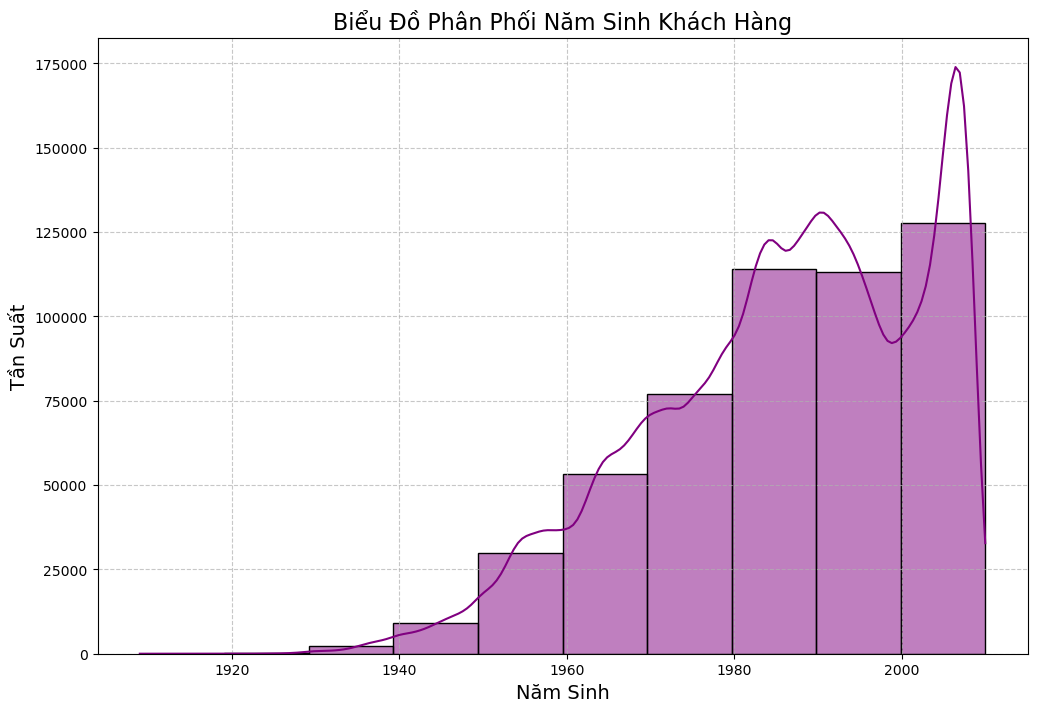

In [13]:
# Vẽ biểu đồ phân phối
plt.figure(figsize=(12, 8))
sns.histplot(df['NAM_SINH'], kde=True, bins=10, color='purple')
plt.title('Biểu Đồ Phân Phối Năm Sinh Khách Hàng', fontsize=16)
plt.xlabel('Năm Sinh', fontsize=14)
plt.ylabel('Tần Suất', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

In [14]:
# Trích xuất tháng từ ngày kích hoạt
df['THANG_KICH_HOAT'] = df['NGAY_HOA_MANG'].dt.month

C:\Users\danhd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


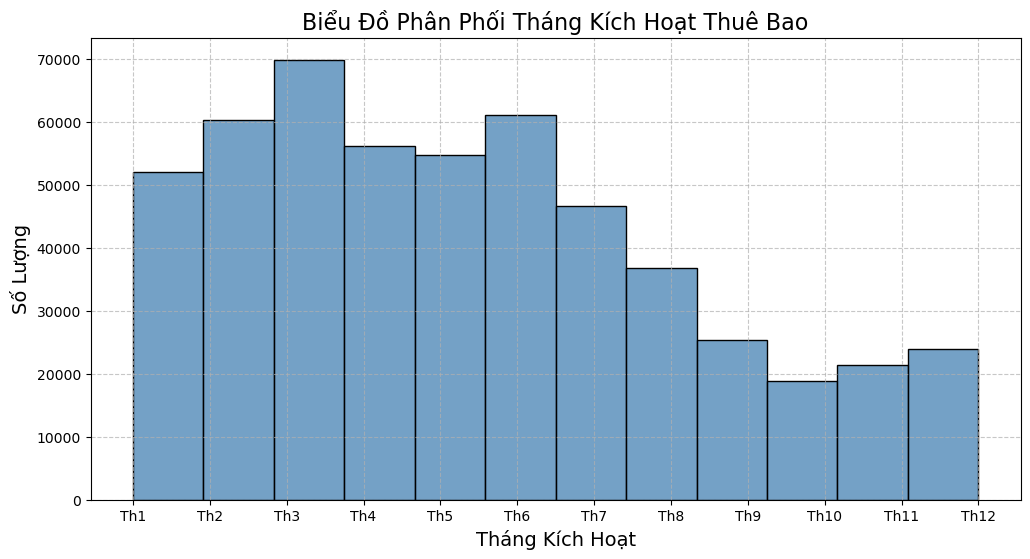

In [15]:
# Vẽ biểu đồ phân phối của tháng kích hoạt
plt.figure(figsize=(12, 6))
sns.histplot(df['THANG_KICH_HOAT'], bins=12, kde=False, color='steelblue')
plt.title('Biểu Đồ Phân Phối Tháng Kích Hoạt Thuê Bao', fontsize=16)
plt.xlabel('Tháng Kích Hoạt', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[
    'Th1', 'Th2', 'Th3', 'Th4', 'Th5', 'Th6',
    'Th7', 'Th8', 'Th9', 'Th10', 'Th11', 'Th12'
])
plt.grid(True, linestyle='--', alpha=0.7)

In [16]:
# Loại bỏ các giá trị tuổi không hợp lệ (tuổi âm hoặc quá cao)
df = df[(df['TUOI_KHACH_HANG'] >= 0) & (df['TUOI_KHACH_HANG'] <= 100)]

C:\Users\danhd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


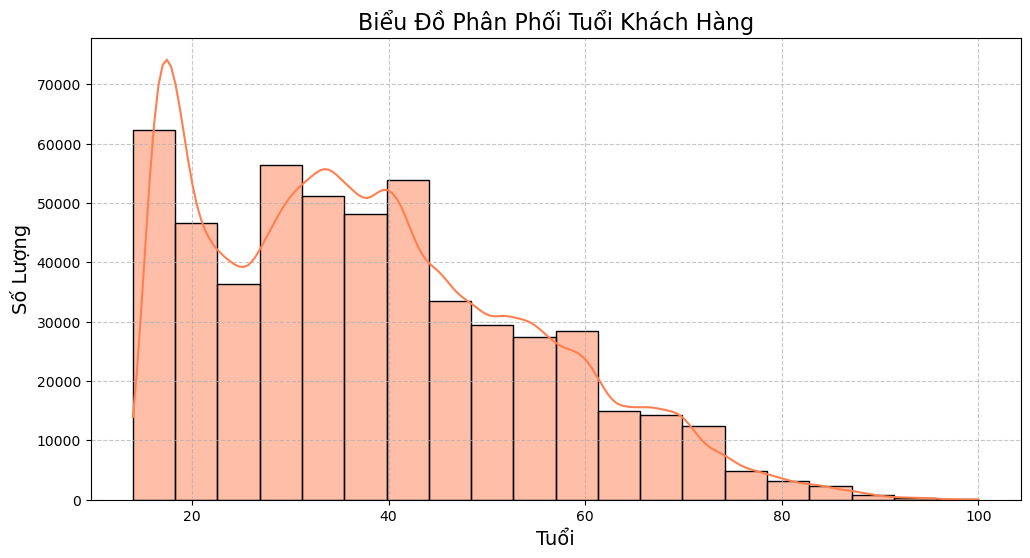

In [17]:
# Vẽ biểu đồ phân phối của tuổi khách hàng
plt.figure(figsize=(12, 6))
sns.histplot(df['TUOI_KHACH_HANG'], bins=20, kde=True, color='coral')

plt.title('Biểu Đồ Phân Phối Tuổi Khách Hàng', fontsize=16)
plt.xlabel('Tuổi', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

In [18]:
# Loại bỏ các giá trị thiếu
df = df.dropna(subset=['DOANH_THU_6_THANG_DAU'])

In [19]:
# Kiểm tra các giá trị của cột DOANH_THU_6_THANG_DAU
print(df['DOANH_THU_6_THANG_DAU'].describe())

count    4.831720e+05
mean     2.532092e+05
std      5.125557e+05
min      0.000000e+00
25%      6.363600e+04
50%      1.090740e+05
75%      2.700000e+05
max      7.074545e+07
Name: DOANH_THU_6_THANG_DAU, dtype: float64


C:\Users\danhd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


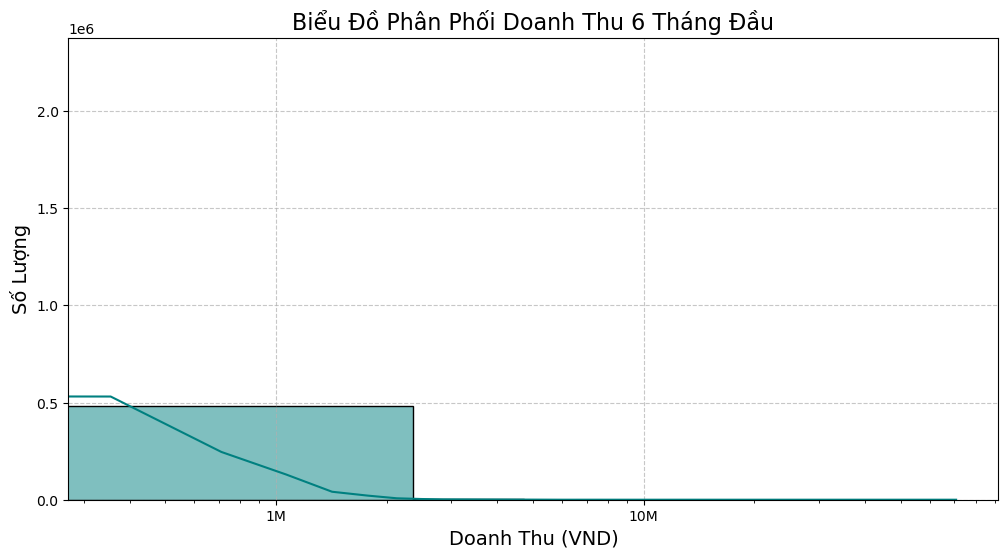

In [20]:
# Vẽ biểu đồ phân phối của doanh thu 6 tháng đầu
plt.figure(figsize=(12, 6))
sns.histplot(df['DOANH_THU_6_THANG_DAU'], bins=30, kde=True, color='teal')

plt.title('Biểu Đồ Phân Phối Doanh Thu 6 Tháng Đầu', fontsize=16)
plt.xlabel('Doanh Thu (VND)', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)

plt.xscale('log')

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))

plt.grid(True, linestyle='--', alpha=0.7)

In [21]:
print(df.columns)


Index(['LOAI', 'MA_THUE_BAO', 'LOAI_THUE_BAO', 'NGAY_HOA_MANG', 'NGAY_HUY',
       'MA_GOI_CUOC', 'GIA_GOI', 'NGAY_DANG_KY', 'NAM_SINH', 'CMND_3_SO_DAU',
       'CCCD_6_SO_DAU', 'CN', 'DOANH_THU_6_THANG_DAU', 'TUOI_KHACH_HANG',
       'THANG_KICH_HOAT'],
      dtype='object')


In [22]:
# Loại bỏ các giá trị thiếu hoặc không hợp lệ
df = df.dropna(subset=['MA_GOI_CUOC'])

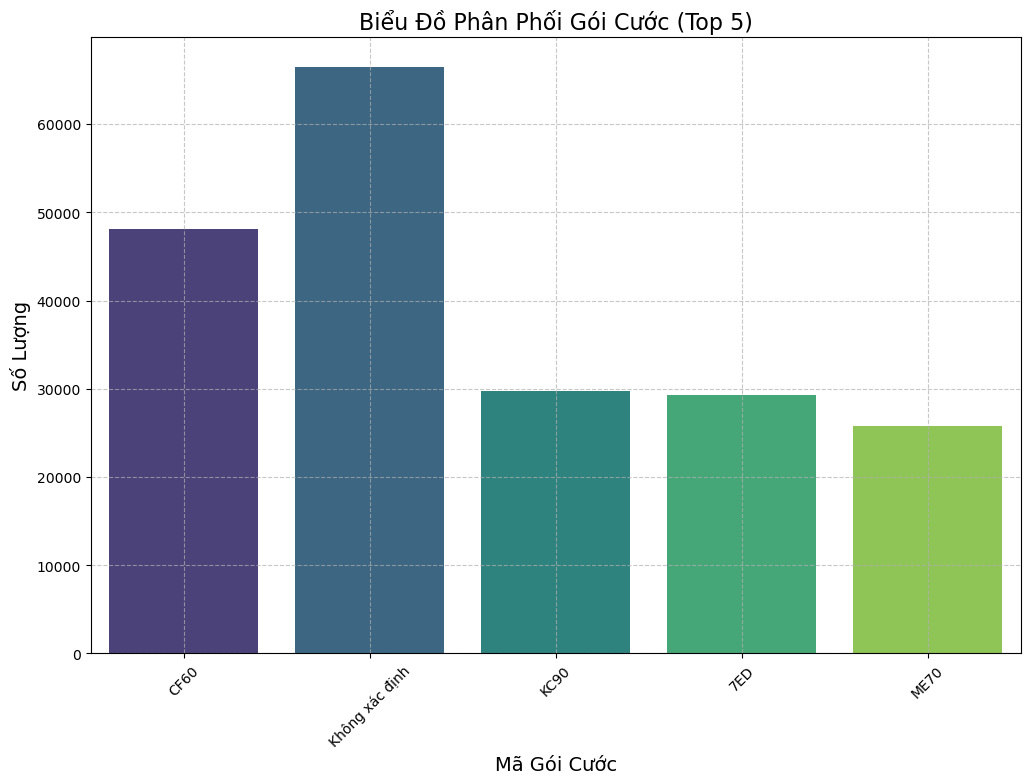

In [23]:
#chọn 5 mã gói cước phổ biến nhất
top_packages = df['MA_GOI_CUOC'].value_counts().nlargest(5).index
df_filtered = df[df['MA_GOI_CUOC'].isin(top_packages)]

plt.figure(figsize=(12, 8))
sns.countplot(x='MA_GOI_CUOC', data=df_filtered, palette='viridis')

plt.title('Biểu Đồ Phân Phối Gói Cước (Top 5)', fontsize=16)
plt.xlabel('Mã Gói Cước', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

C:\Users\danhd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


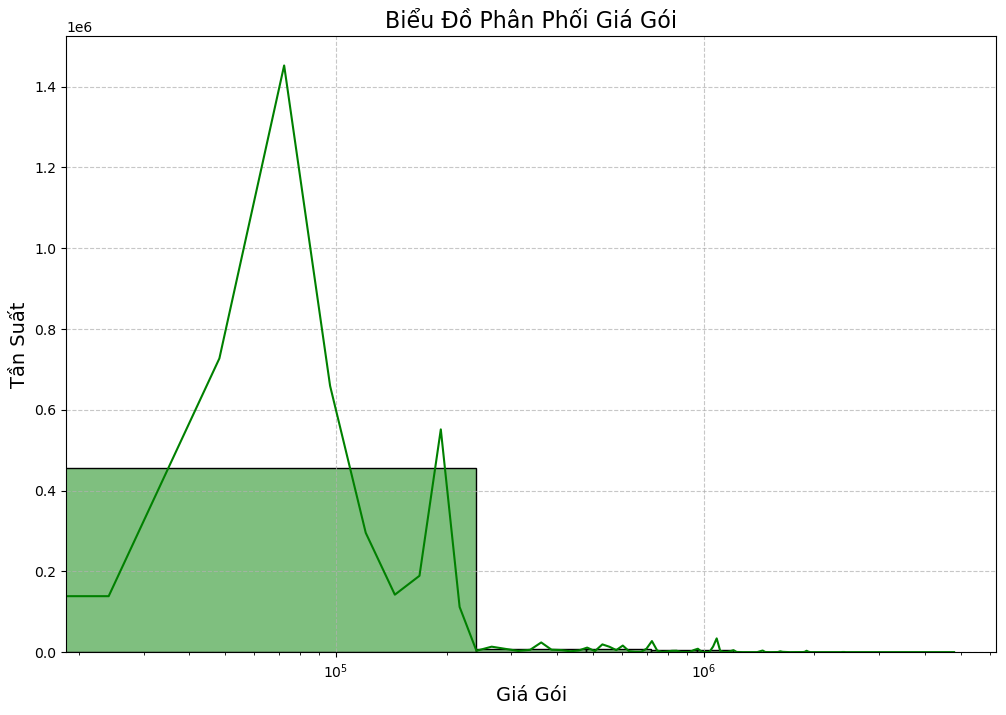

In [24]:
# Vẽ biểu đồ phân phối của giá gói
plt.figure(figsize=(12, 8))
sns.histplot(df['GIA_GOI'], bins=20, kde=True, color='green')

plt.title('Biểu Đồ Phân Phối Giá Gói', fontsize=16)
plt.xlabel('Giá Gói', fontsize=14)
plt.ylabel('Tần Suất', fontsize=14)

plt.xscale('log')

plt.grid(True, linestyle='--', alpha=0.7)

## 2.Khám Phá Tính Tương Quan

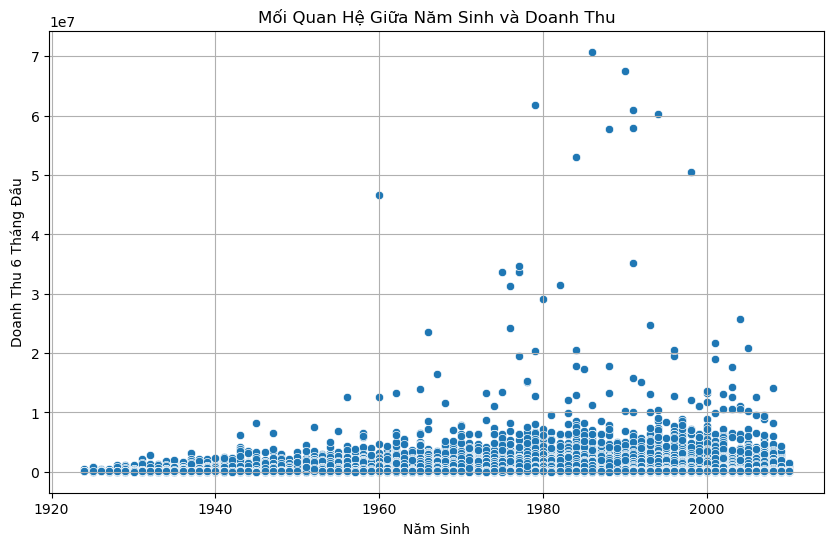

In [25]:
# Vẽ biểu đồ phân tán giữa năm sinh và doanh thu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NAM_SINH', y='DOANH_THU_6_THANG_DAU', data=df)
plt.title('Mối Quan Hệ Giữa Năm Sinh và Doanh Thu')
plt.xlabel('Năm Sinh')
plt.ylabel('Doanh Thu 6 Tháng Đầu')
plt.grid(True)
plt.show()

In [26]:
import statsmodels.api as sm

X = df[['NAM_SINH']]
y = df['DOANH_THU_6_THANG_DAU']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     DOANH_THU_6_THANG_DAU   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     29.15
Date:                   Sat, 20 Jul 2024   Prob (F-statistic):           6.72e-08
Time:                           10:46:53   Log-Likelihood:            -7.0379e+06
No. Observations:                 483172   AIC:                         1.408e+07
Df Residuals:                     483170   BIC:                         1.408e+07
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.296e+05 

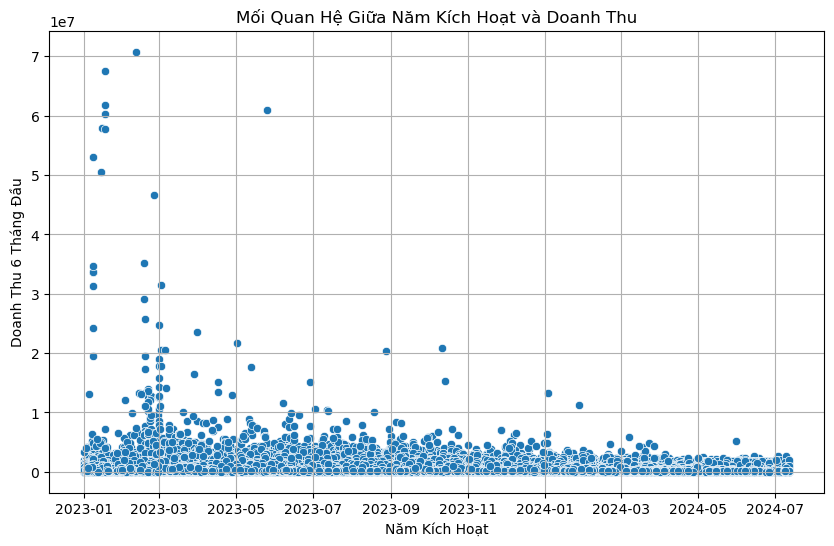

In [27]:
# Vẽ biểu đồ phân tán giữa năm kích hoạt và doanh thu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NGAY_HOA_MANG', y='DOANH_THU_6_THANG_DAU', data=df)
plt.title('Mối Quan Hệ Giữa Năm Kích Hoạt và Doanh Thu')
plt.xlabel('Năm Kích Hoạt')
plt.ylabel('Doanh Thu 6 Tháng Đầu')
plt.grid(True)
plt.show()

In [28]:
# Đếm số lượng bản ghi cho từng mã gói cước
top_5_goi_cuoc = df['MA_GOI_CUOC'].value_counts().head(5).index

In [29]:
# Lọc dữ liệu chỉ giữ các bản ghi có mã gói cước trong top 5
df_top_5 = df[df['MA_GOI_CUOC'].isin(top_5_goi_cuoc)]

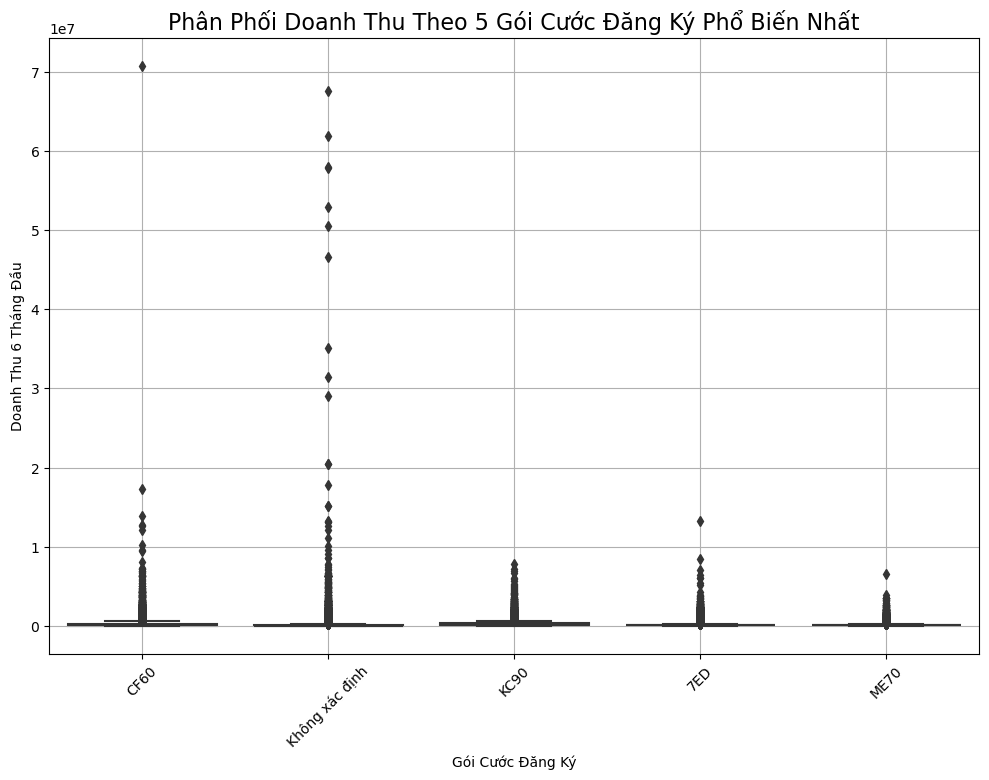

In [30]:
#biểu đồ phân phối doanh thu theo 5 gói cước phổ biến nhất
plt.figure(figsize=(12, 8))
sns.boxplot(x='MA_GOI_CUOC', y='DOANH_THU_6_THANG_DAU', data=df_top_5, palette='viridis')

plt.xticks(rotation=45)
plt.title('Phân Phối Doanh Thu Theo 5 Gói Cước Đăng Ký Phổ Biến Nhất', fontsize=16)
plt.xlabel('Gói Cước Đăng Ký')
plt.ylabel('Doanh Thu 6 Tháng Đầu')
plt.grid(True)
plt.show()

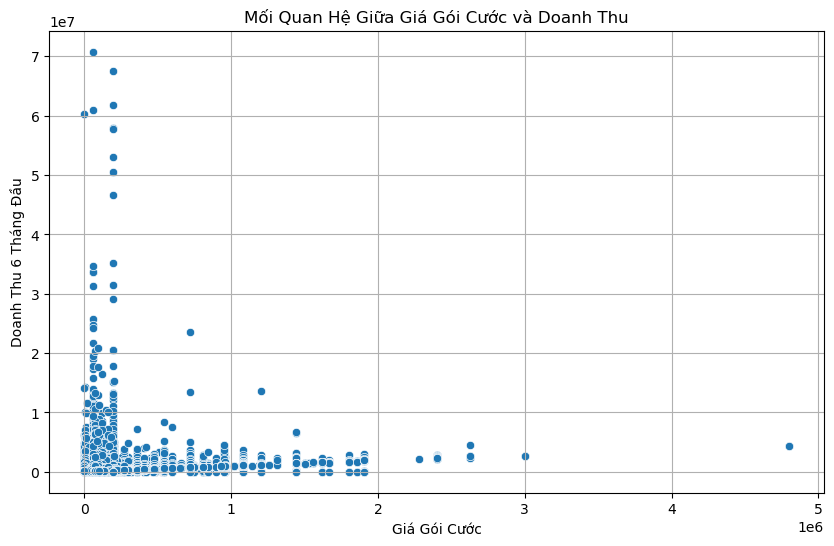

In [31]:
#biểu đồ phân tán giữa giá gói cước và doanh thu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GIA_GOI', y='DOANH_THU_6_THANG_DAU', data=df)
plt.title('Mối Quan Hệ Giữa Giá Gói Cước và Doanh Thu')
plt.xlabel('Giá Gói Cước')
plt.ylabel('Doanh Thu 6 Tháng Đầu')
plt.grid(True)
plt.show()

In [32]:
# Tạo mô hình hồi quy tuyến tính
X = df[['GIA_GOI']]
y = df['DOANH_THU_6_THANG_DAU']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     DOANH_THU_6_THANG_DAU   R-squared:                       0.067
Model:                               OLS   Adj. R-squared:                  0.067
Method:                    Least Squares   F-statistic:                 3.484e+04
Date:                   Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                           10:46:56   Log-Likelihood:            -7.0211e+06
No. Observations:                 483172   AIC:                         1.404e+07
Df Residuals:                     483170   BIC:                         1.404e+07
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.573e+05 

In [40]:
# Mối quan hệ giữa Gói Cước Đăng Ký và Doanh Thu
popular_goicuoc = df['MA_GOI_CUOC'].value_counts().nlargest(5).index
df_filtered = df[df['MA_GOI_CUOC'].isin(popular_goicuoc)]

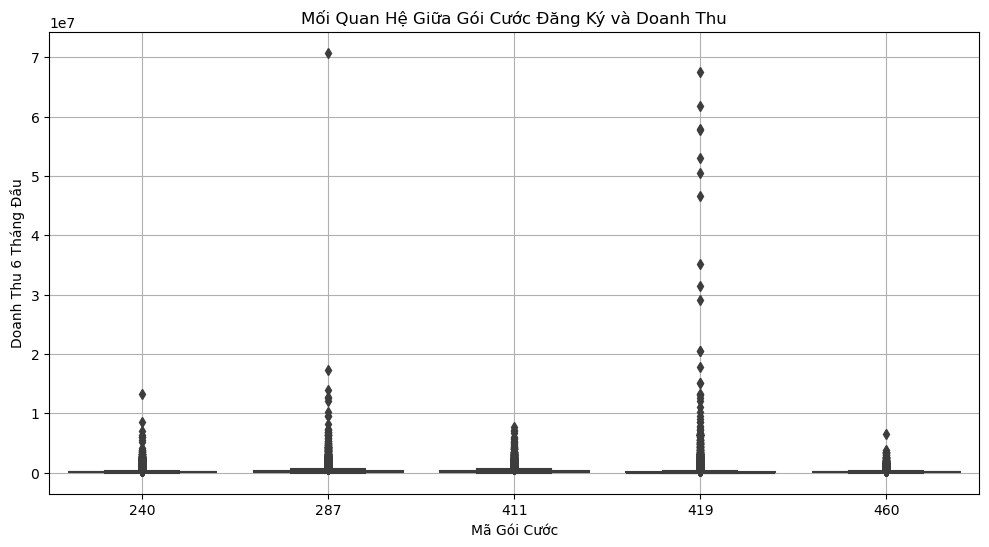

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='MA_GOI_CUOC', y='DOANH_THU_6_THANG_DAU')
plt.title('Mối Quan Hệ Giữa Gói Cước Đăng Ký và Doanh Thu')
plt.xlabel('Mã Gói Cước')
plt.ylabel('Doanh Thu 6 Tháng Đầu')
plt.grid(True)
plt.show()

## 3.Dự Đoán và Tư Duy Dựa Trên Dữ Liệu

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [34]:
# Chuyển đổi cột ngày tháng thành số ngày từ ngày bắt đầu (Ví dụ: ngày 1970-01-01)
df['NGAY_HOA_MANG'] = (pd.to_datetime(df['NGAY_HOA_MANG']) - pd.Timestamp('1970-01-01')).dt.days
df['NGAY_DANG_KY'] = (pd.to_datetime(df['NGAY_DANG_KY']) - pd.Timestamp('1970-01-01')).dt.days

In [46]:
df.fillna(0, inplace=True) 

label_encoders = {}
for column in ['MA_GOI_CUOC', 'CN']:  # Danh sách các cột phân loại
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df[['NAM_SINH', 'NGAY_HOA_MANG', 'NGAY_DANG_KY', 'MA_GOI_CUOC', 'GIA_GOI', 'CN']]
y = df['DOANH_THU_6_THANG_DAU']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 274574768760.48428
R^2 Score: 0.0883855424906016


In [39]:
# Dự đoán doanh thu cho một khách hàng mới
new_customer = pd.DataFrame({
    'NAM_SINH': [1985],
    'NGAY_HOA_MANG': [(pd.to_datetime('2024-01-01') - pd.Timestamp('1970-01-01')).days],
    'NGAY_DANG_KY': [(pd.to_datetime('2024-07-01') - pd.Timestamp('1970-01-01')).days],
    'MA_GOI_CUOC': [3],  # Phải mã hóa trước khi dự đoán
    'GIA_GOI': [60000],
    'CN': [2]  # Phải mã hóa trước khi dự đoán
})

# Chuyển đổi dữ liệu mới
new_customer_scaled = scaler.transform(new_customer)

# Dự đoán doanh thu
future_revenue = model.predict(new_customer_scaled)
print(f"c: {future_revenue[0]}")

Predicted Future Revenue: 159229.3118282308


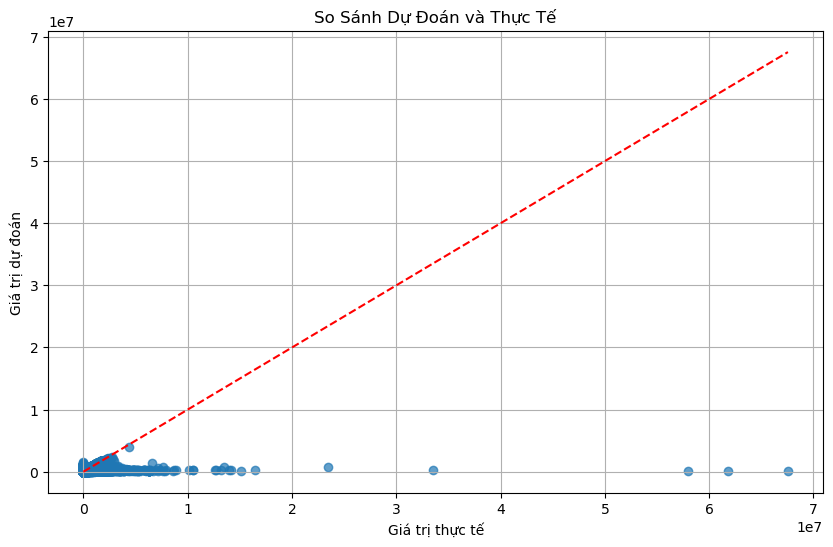

In [45]:
# Vẽ biểu đồ so sánh dự đoán và thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So Sánh Dự Đoán và Thực Tế')
plt.grid(True)
plt.show()